In [194]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

In [4]:
datasetDir = "C:/Users/isony/Downloads/aptos2019-blindness-detection/train_images"

In [8]:
# importing data
train_df = pd.read_csv('C:/Users/isony/Downloads/aptos2019-blindness-detection/train.csv')
test_df = pd.read_csv('C:/Users/isony/Downloads/aptos2019-blindness-detection/test.csv')   

In [22]:
test_df.head()

,id_code
0,0005cfc8afb6
1,003f0afdcd15
2,006efc72b638
3,00836aaacf06
4,009245722fa4


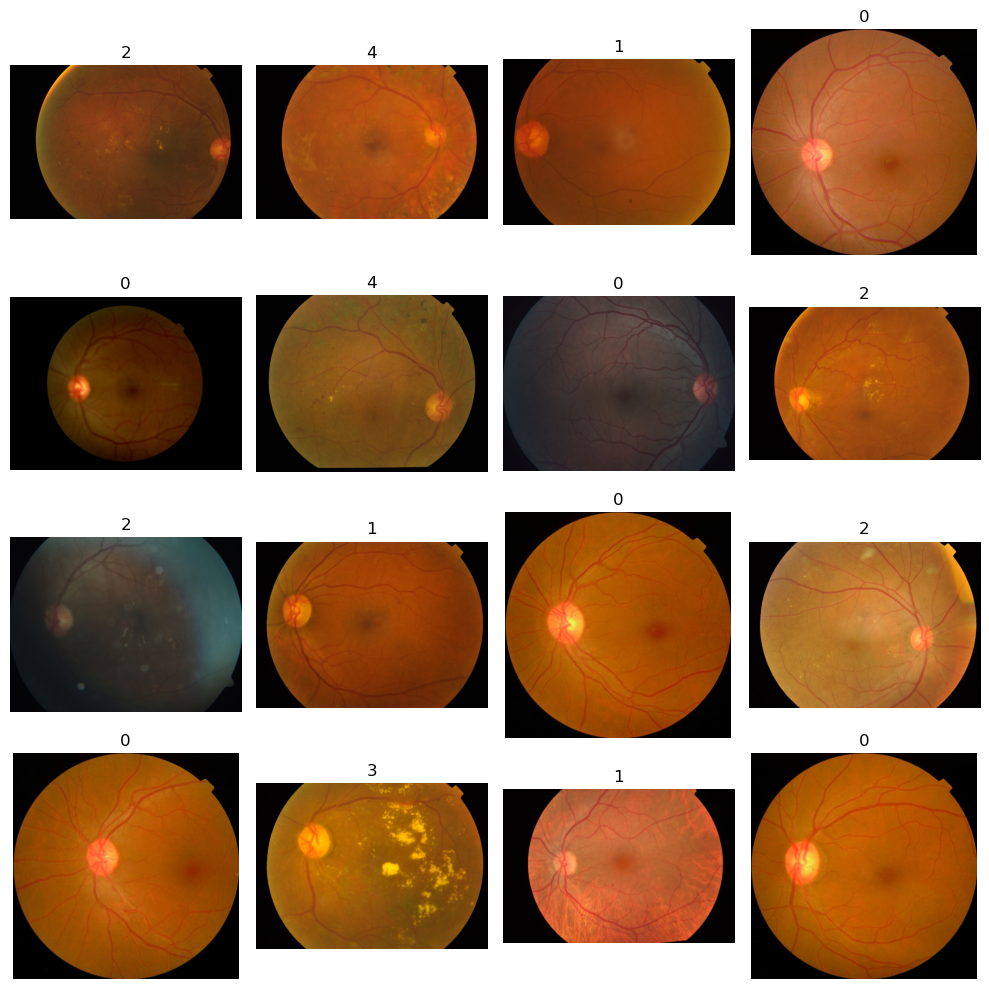

In [14]:
# to display images
def display_image(df, rows, columns):
    fig=plt.figure(figsize=(10, 10))

    for i in range(columns*rows):
        image_path = df.loc[i,'id_code']
        image_id = df.loc[i,'diagnosis']
        img = cv2.imread(f'C:/Users/isony/Downloads/aptos2019-blindness-detection/train_images/{image_path}.png')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        fig.add_subplot(rows, columns, i+1)
        plt.title(image_id)
        plt.axis('off')
        plt.imshow(img)
    
    plt.tight_layout()
    plt.show()
    
def display_single_image(img):
    fig=plt.figure(figsize=(10, 10))
    plt.title('Sample Img')
    plt.imshow(img)
    plt.show()
    
display_image(train_df, 4, 4)

In [34]:
IMG_SIZE = 150
# image pre-pocessing helper function
def load_ben_color(path, path2):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (IMG_SIZE,IMG_SIZE))
    cv2.imwrite(path2, image)
    return image

def preprocess_image(image_path, path2):
    img = load_ben_color(image_path, path2)
    return img

x_train = np.empty((train_df.shape[0], IMG_SIZE, IMG_SIZE, 3), dtype=np.uint8)
for i, image_id in enumerate((train_df['id_code'])):
    x_train[i, :, :, :] = preprocess_image(f'C:/Users/isony/Downloads/aptos2019-blindness-detection/train_images/{image_id}.png',f'C:/Users/isony/Downloads/aptos2019-blindness-detection/pre_train/{image_id}.png')

x_test = np.empty((test_df.shape[0], IMG_SIZE, IMG_SIZE, 3), dtype=np.uint8)
for i, image_id in enumerate((test_df['id_code'])):
    x_test[i, :, :, :] = preprocess_image(f'C:/Users/isony/Downloads/aptos2019-blindness-detection/test_images/{image_id}.png',f'C:/Users/isony/Downloads/aptos2019-blindness-detection/pre_test/{image_id}.png')

# get one-hot encoded diagnosis
y_train = pd.get_dummies(train_df['diagnosis']).values

In [41]:
print("x_train.shape=",x_train.shape)
print("y_train.shape=",y_train.shape)
print("x_test.shape=",x_test.shape)
x_train.shape[3]

x_train.shape= (3662, 150, 150, 3)
y_train.shape= (3662, 5)
x_test.shape= (1928, 150, 150, 3)


3

In [50]:
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img


import matplotlib.pyplot as plt
from keras import backend as K
from glob import glob
import json

train_path = "../DATASET/DR_DATA/TRAIN/TRAIN_RESIZED"
test_path = "../DATASET/DR_DATA/TEST/TEST_RESIZED"

img_size = 150

numb_of_classes = 5

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_size, img_size)
else:
    input_shape = (img_size, img_size, 3)

model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = input_shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(units = numb_of_classes))
model.add(Activation("softmax"))

model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

batch_size = 32



In [59]:
from sklearn.model_selection import train_test_split
# splitting data into training and validation data
x_sptrain, x_spval, y_sptrain, y_spval = train_test_split(
    x_train, y_train, 
    test_size=0.10, 
    random_state=420
)

In [61]:
history =model.fit(x_sptrain, 
                y_sptrain,
                validation_data=(x_spval, y_spval),
                batch_size=batch_size, 
                shuffle=True,
                verbose=1,
                epochs=15,steps_per_epoch = (800//batch_size),validation_steps = 400//batch_size)

Epoch 1/15
103/103 [==============================] - 30s 284ms/step - loss: 15.3550 - accuracy: 0.6510 - val_loss: 0.8677 - val_accuracy: 0.6921
Epoch 2/15
103/103 [==============================] - 29s 283ms/step - loss: 0.9446 - accuracy: 0.7044 - val_loss: 0.8400 - val_accuracy: 0.6948
Epoch 3/15
103/103 [==============================] - 28s 274ms/step - loss: 0.8997 - accuracy: 0.7144 - val_loss: 0.7947 - val_accuracy: 0.7139
Epoch 4/15
103/103 [==============================] - 28s 273ms/step - loss: 0.8156 - accuracy: 0.7144 - val_loss: 0.8801 - val_accuracy: 0.7030
Epoch 5/15
103/103 [==============================] - 28s 276ms/step - loss: 0.9692 - accuracy: 0.7126 - val_loss: 0.8207 - val_accuracy: 0.7003
Epoch 6/15
103/103 [==============================] - 29s 280ms/step - loss: 0.7843 - accuracy: 0.7266 - val_loss: 0.8222 - val_accuracy: 0.7112
Epoch 7/15
103/103 [==============================] - 28s 274ms/step - loss: 0.8026 - accuracy: 0.7199 - val_loss: 0.8274 - val_a

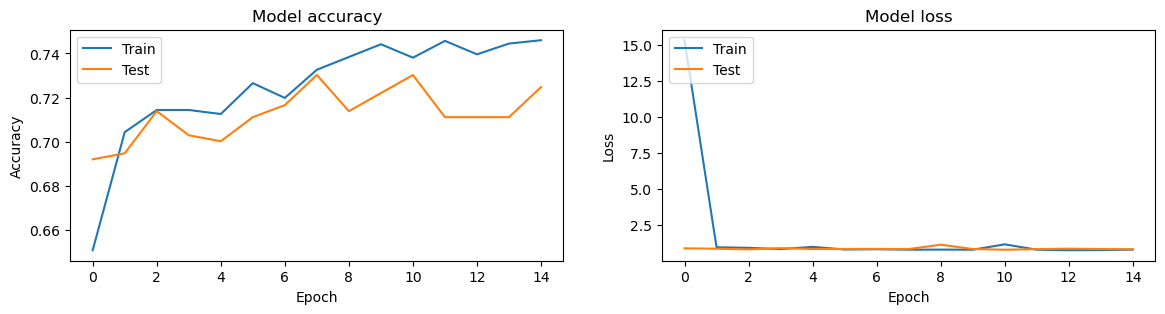

In [63]:
from matplotlib import pyplot as plt
# Plot training & validation accuracy values
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

12/12 [==============================] - 1s 57ms/step


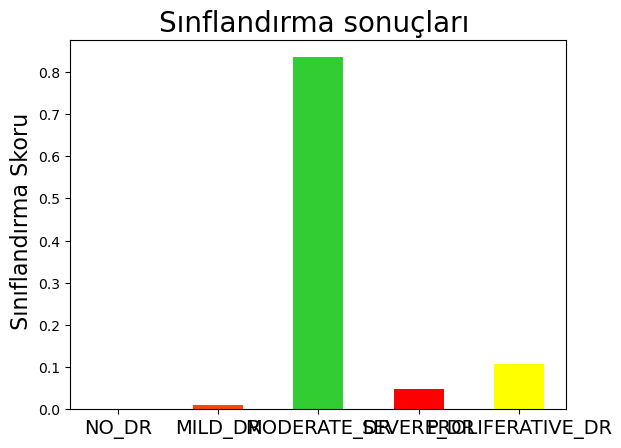

Tahmin sonucu: MODERATE_DR
Gerçek sonuç: MODERATE_DR
Tahmin sonucu: MODERATE_DR
Gerçek sonuç: MODERATE_DR
Tahmin sonucu: MODERATE_DR
Gerçek sonuç: MODERATE_DR
Tahmin sonucu: MODERATE_DR
Gerçek sonuç: MODERATE_DR
Tahmin sonucu: MODERATE_DR
Gerçek sonuç: MODERATE_DR
Tahmin sonucu: MODERATE_DR
Gerçek sonuç: MODERATE_DR
Tahmin sonucu: MODERATE_DR
Gerçek sonuç: SEVERE_DR
Tahmin sonucu: NO_DR
Gerçek sonuç: NO_DR
Tahmin sonucu: NO_DR
Gerçek sonuç: NO_DR
Tahmin sonucu: MODERATE_DR
Gerçek sonuç: MODERATE_DR
Tahmin sonucu: MODERATE_DR
Gerçek sonuç: MODERATE_DR
Tahmin sonucu: NO_DR
Gerçek sonuç: NO_DR
Tahmin sonucu: NO_DR
Gerçek sonuç: NO_DR
Tahmin sonucu: NO_DR
Gerçek sonuç: NO_DR
Tahmin sonucu: SEVERE_DR
Gerçek sonuç: SEVERE_DR
Tahmin sonucu: MODERATE_DR
Gerçek sonuç: PROLIFERATIVE_DR
Tahmin sonucu: NO_DR
Gerçek sonuç: NO_DR
Tahmin sonucu: NO_DR
Gerçek sonuç: NO_DR
Tahmin sonucu: MILD_DR
Gerçek sonuç: MILD_DR
Tahmin sonucu: MODERATE_DR
Gerçek sonuç: MODERATE_DR
Tahmin sonucu: MODERATE_DR
Gerçek

In [93]:
results = model.predict(x_spval)
#sınıflarımız, 5 adet türü var
class_names = ["NO_DR" , "MILD_DR" , "MODERATE_DR" , "SEVERE_DR" , "PROLIFERATIVE_DR"]
ind = 0.2*np.arange(len(class_names))
width = 0.1 #bar genişliği
color_list = ['blue','orangered','limegreen','red','yellow']
#sonuçlarımızı renklendirelim
for i in range(len(class_names)):
    plt.bar(ind[i], results[0][i], width, color=color_list[i])
plt.title("Sınflandırma sonuçları ",fontsize=20)
plt.ylabel(" Sınıflandırma Skoru",fontsize=16)
plt.xticks(ind, class_names, rotation=0, fontsize=14)
plt.show()
for i in range(100):
    print("Tahmin sonucu:", class_names[np.argmax(results[i])])
    print("Gerçek sonuç:",class_names[np.argmax(y_spval[i])])

In [90]:
results.size

1835

In [94]:
y_test = model.predict(x_test)

61/61 [==============================] - 4s 58ms/step


In [96]:
x_test

array([[[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        ...,

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]],


       [[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0,

In [124]:
for i in range(100):
    print(str(test_df.iloc[i:i+1]['id_code'][i]))

0005cfc8afb6
003f0afdcd15
006efc72b638
00836aaacf06
009245722fa4
009c019a7309
010d915e229a
0111b949947e
01499815e469
0167076e7089
01c31b10ab99
01c5ba195207
01e4d86b3a30
020921b796d5
020f6983114d
021c207614d6
0229c0a80d42
024d0a225db1
0268f4382c67
0299d97f31f7
03042a663e54
030e06ddbb04
033cdbbbdfaa
03be80919be4
03eaa4eef484
0434995d0654
04a0773c71fb
04e1b77ef107
051d9d12a6ee
052e00f47cfa
06035cfbcc18
061e7dab2b76
0622a0f615db
062ed40f5272
0654cdd3c01a
065cb18bb0b2
069037e82135
069ebdb1023d
06cdd3f3f262
06daa7390238
06e60df1823e
0737dfb0a164
0749255f718d
07685fac659a
079e029f3b2e
07d8d154e752
081c7ec32f27
082c7ccb536a
082fc6f323a1
086727c22b75
087966da55c2
08a5afa9d62c
08cfae721bd8
08dc27511636
0904fcd03369
0928150bb29a
0946ae407745
0952ca2ece1c
096d6bb6546b
097614f1dcae
09855c888f9f
09b5e952f996
09d32c9008ca
0a0780ad3395
0a262e8b2a5a
0a2b5e1a0be8
0ad36156ad5d
0aebb1b2aef1
0af080866c24
0af338c60d2d
0b121d798018
0b65c09c7bac
0b88274d5d7d
0ba16f32500e
0bab4b301d71
0bfa8ea173d6
0c39fa1f2cfa

In [190]:
rng = int(y_test.size/5)

    
ss = pd.DataFrame(columns=['id_code', 'diagnosis'])
for i in range(rng):
    ss = pd.concat([pd.DataFrame([[test_df.iloc[i:i+1]['id_code'][i],[np.argmax(y_test[i])][0]]], columns=ss.columns), ss], ignore_index=True)

In [191]:
ss

,id_code,diagnosis
0,ffdc2152d455,0
1,ffa73465b705,1
2,ff64897ac0d8,2
3,ff4c945d9b17,2
4,ff2fd94448de,2
...,...,...
1923,009245722fa4,2
1924,00836aaacf06,2
1925,006efc72b638,2
1926,003f0afdcd15,2


In [192]:
maindir = "C:/Users/isony/Downloads/aptos2019-blindness-detection"

In [193]:
ss.to_csv(maindir+"/submission_example.csv", index=False)